In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()

'C:\\Users\\welcome'

In [3]:
#loading dataset
df=pd.read_csv('C:\\Users\\welcome\\Downloads\\Car choice\\sportscar_choice_long.csv')

In [4]:
df

,resp_id,ques,alt,segment,seat,trans,convert,price,choice
0,1,1,1,basic,2,manual,yes,35,0
1,1,1,2,basic,5,auto,no,40,0
2,1,1,3,basic,5,auto,no,30,1
3,1,2,1,basic,5,manual,no,35,0
4,1,2,2,basic,2,manual,no,30,1
...,...,...,...,...,...,...,...,...,...
5995,200,9,2,fun,2,auto,yes,35,0
5996,200,9,3,fun,4,manual,no,30,0
5997,200,10,1,fun,4,auto,yes,40,0
5998,200,10,2,fun,4,auto,no,30,1


In [5]:
df=pd.DataFrame(df)

In [6]:
#Finding missing values
df.isna().sum()

resp_id    0
ques       0
alt        0
segment    0
seat       0
trans      0
convert    0
price      0
choice     0
dtype: int64

In [7]:
#data types for each festure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   resp_id  6000 non-null   int64 
 1   ques     6000 non-null   int64 
 2   alt      6000 non-null   int64 
 3   segment  6000 non-null   object
 4   seat     6000 non-null   int64 
 5   trans    6000 non-null   object
 6   convert  6000 non-null   object
 7   price    6000 non-null   int64 
 8   choice   6000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 422.0+ KB


In [8]:
#NO of rows and columns
print('no of rows',len(df))
print('no of columns',len(df.columns))

no of rows 6000
no of columns 9


In [9]:
#droppping resp id since its not required
df.drop('resp_id',axis=1,inplace=True)

In [10]:
df

,ques,alt,segment,seat,trans,convert,price,choice
0,1,1,basic,2,manual,yes,35,0
1,1,2,basic,5,auto,no,40,0
2,1,3,basic,5,auto,no,30,1
3,2,1,basic,5,manual,no,35,0
4,2,2,basic,2,manual,no,30,1
...,...,...,...,...,...,...,...,...
5995,9,2,fun,2,auto,yes,35,0
5996,9,3,fun,4,manual,no,30,0
5997,10,1,fun,4,auto,yes,40,0
5998,10,2,fun,4,auto,no,30,1


In [11]:
dummied=pd.get_dummies(df,columns=['ques','alt','segment','seat','trans','convert'])

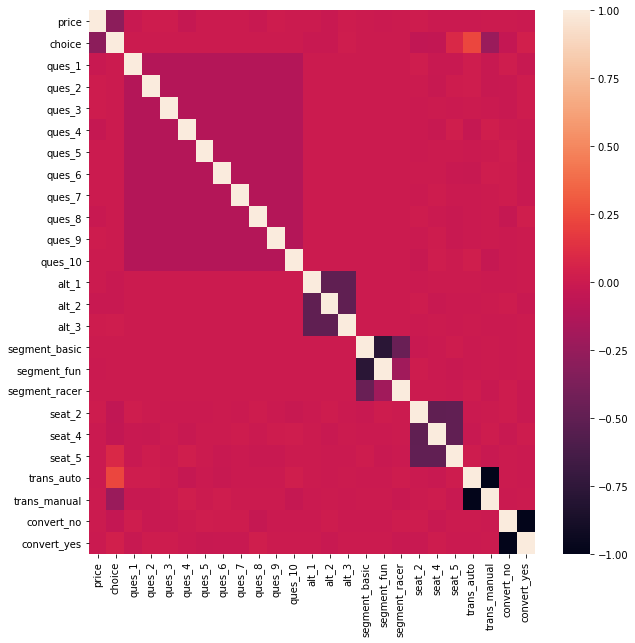

In [12]:
#finding correlation
plt.figure(figsize=(10,10))
sns.heatmap(dummied.corr())

In [13]:
#installing Autoviz
pip install autoviz

Note: you may need to restart the kernel to use updated packages.


In [14]:

from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (6000, 9)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 6000 exceeds maximum, randomly sampling 6000 rows for EDA...

################ Binary_Classification VISUALIZATION Started #####################


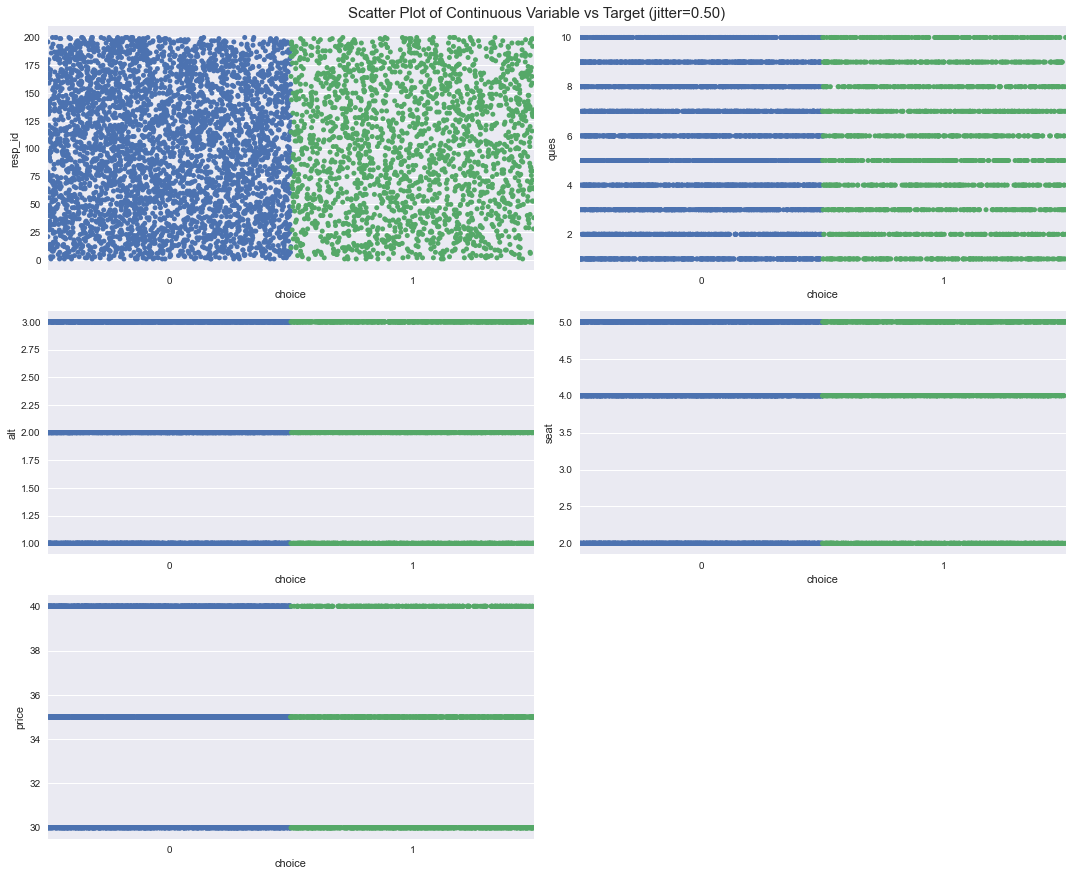

Total Number of Scatter Plots = 15


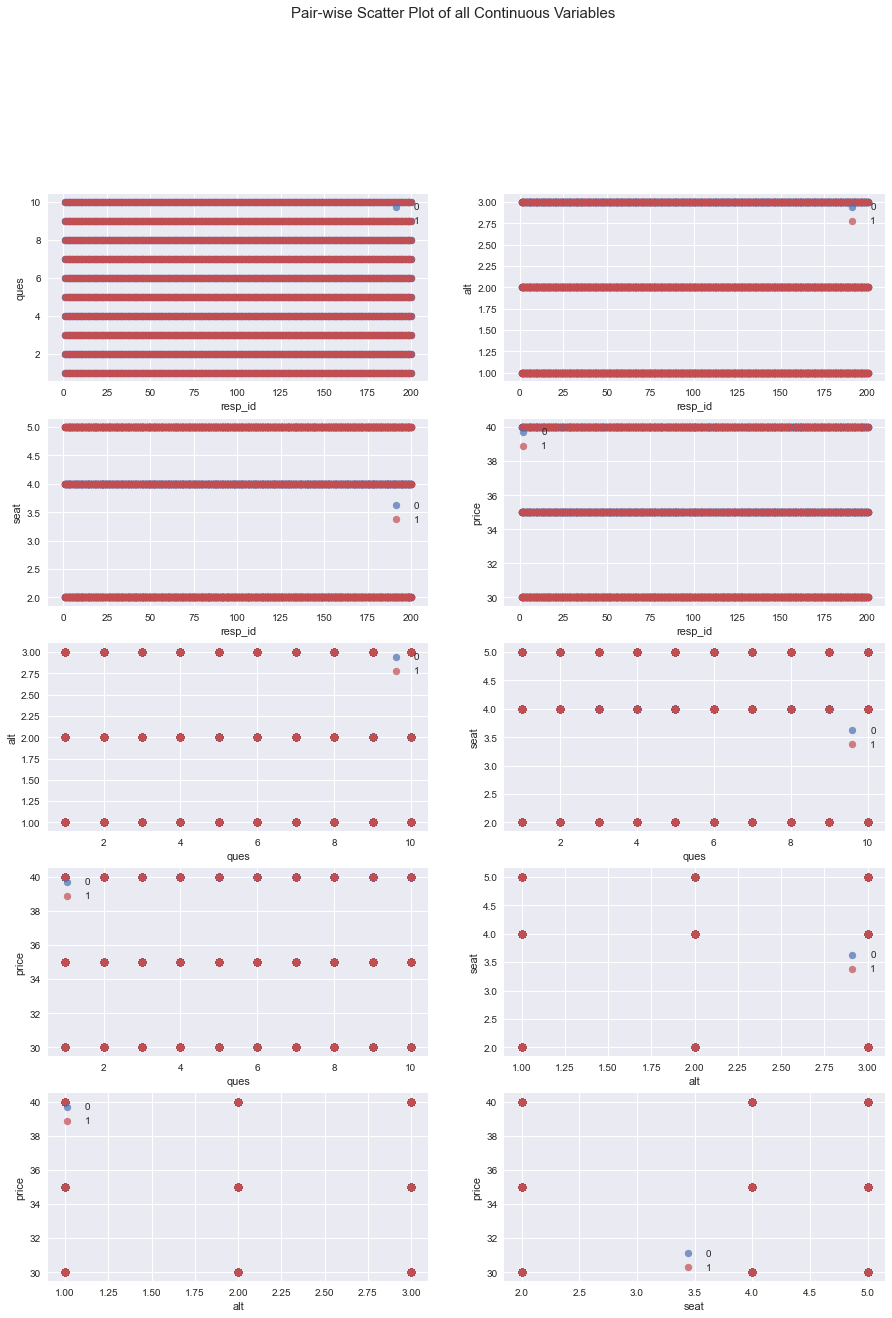

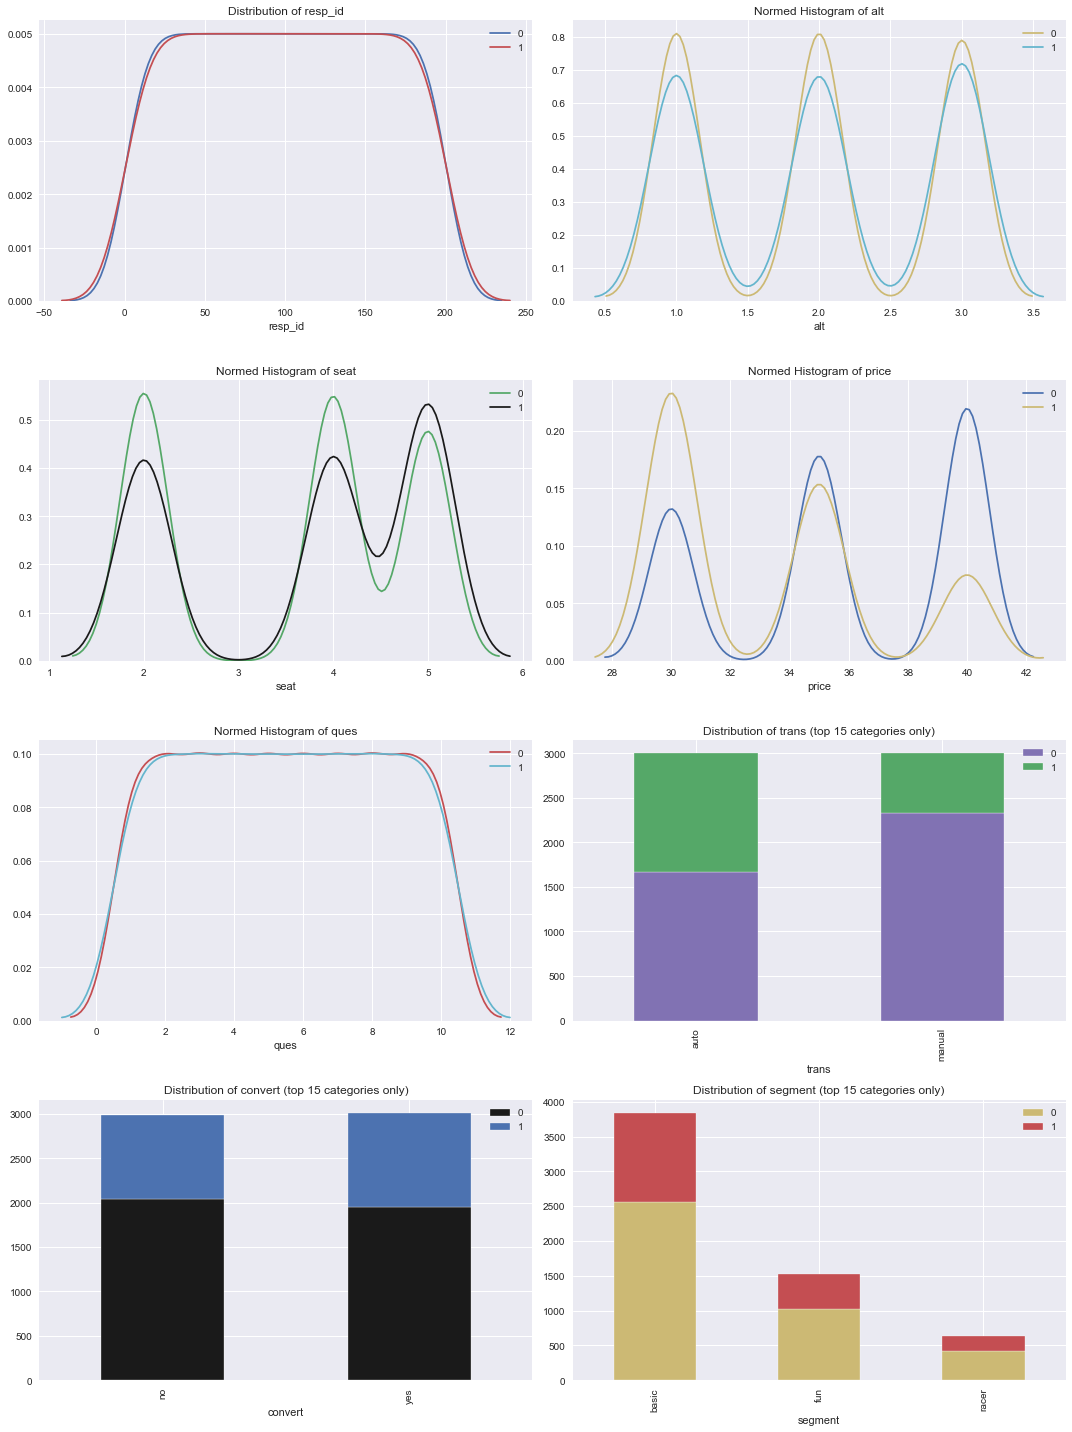

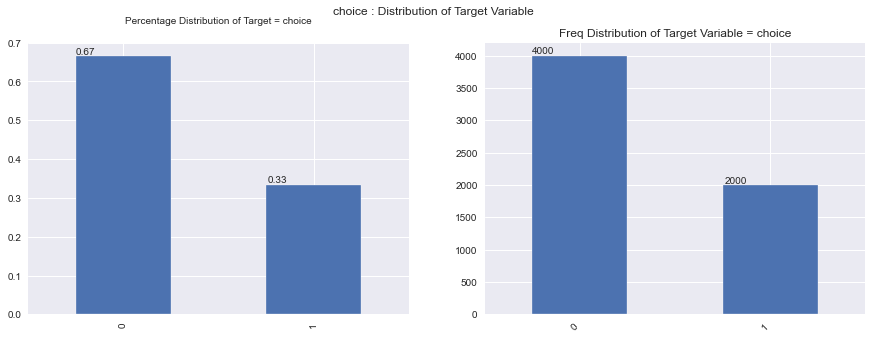

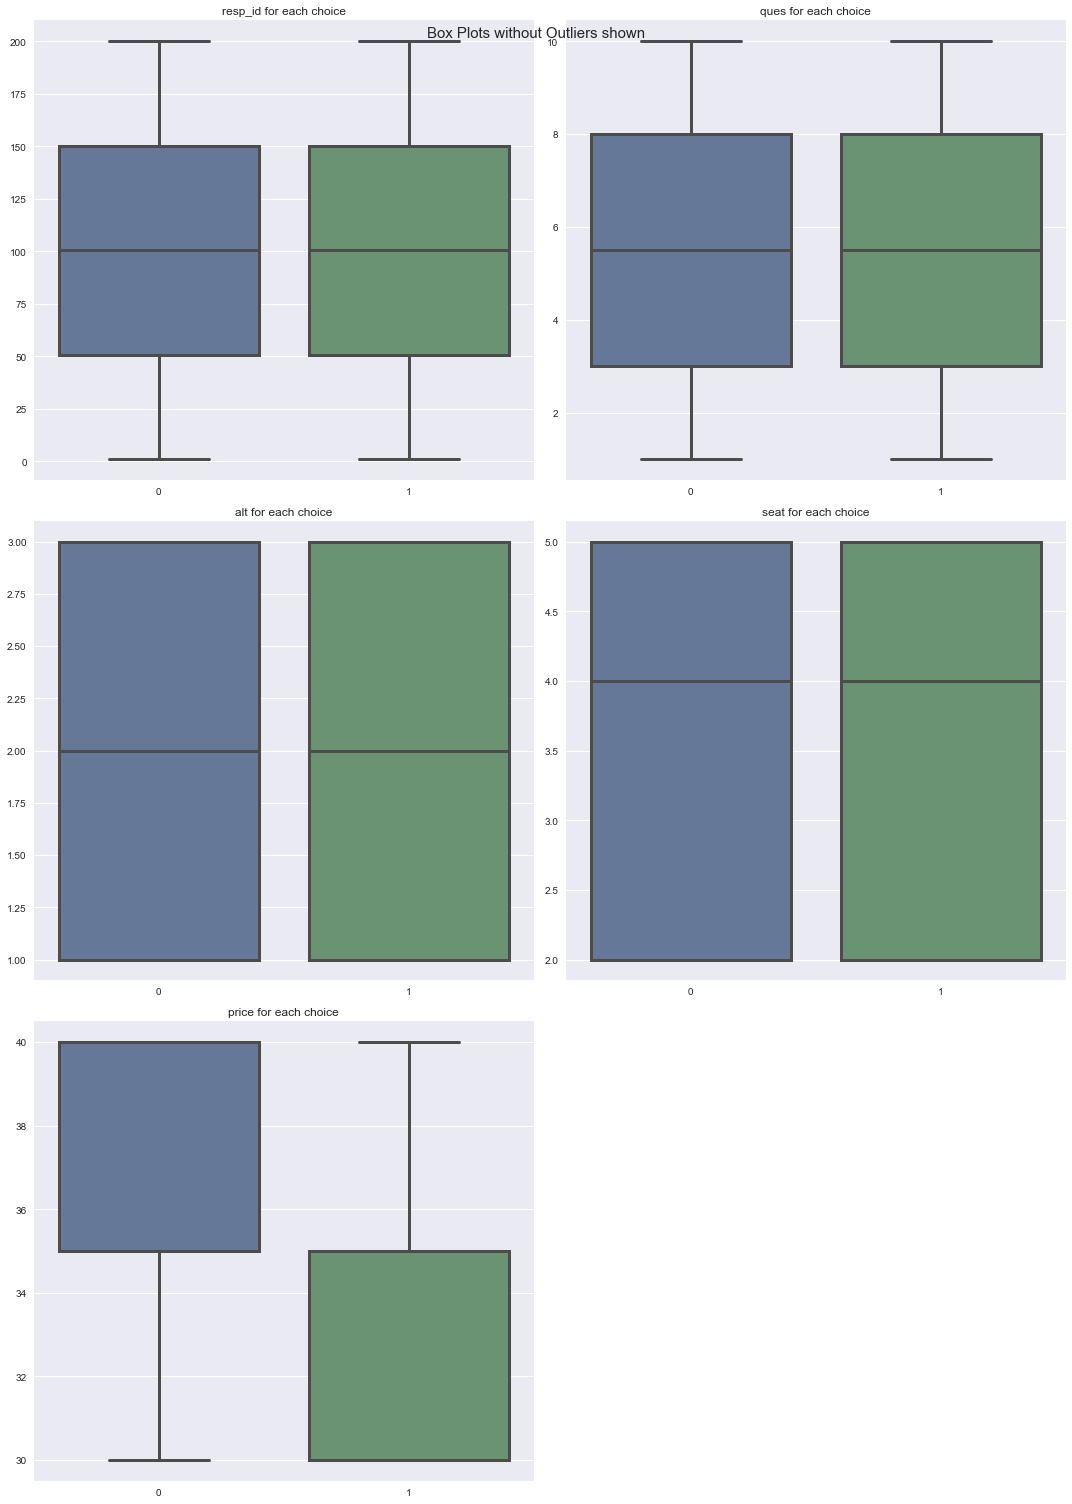

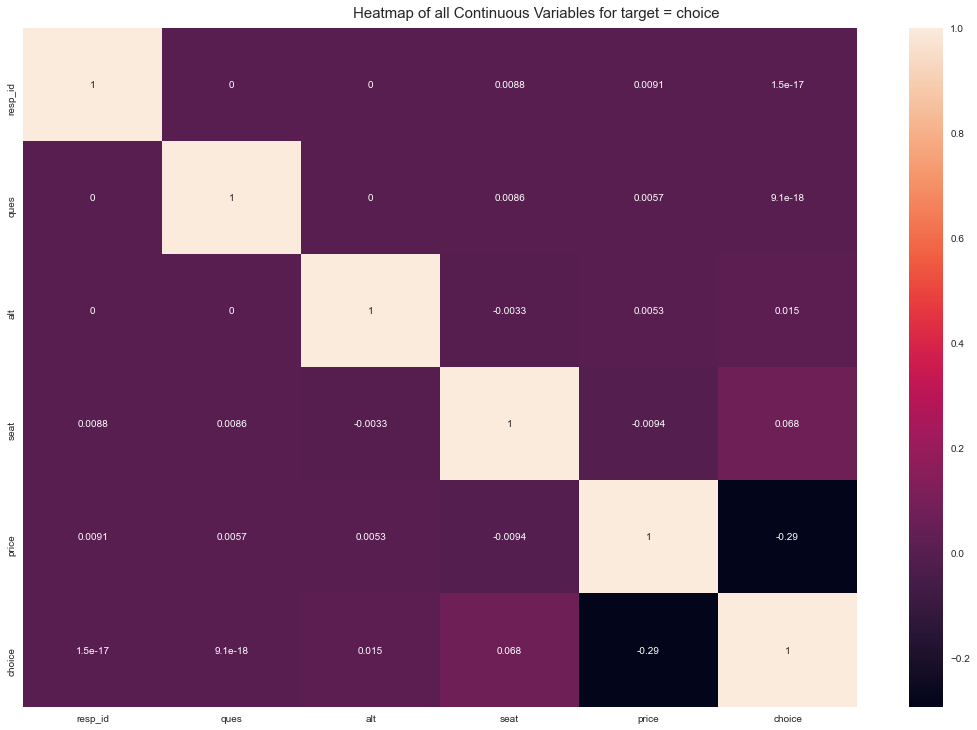

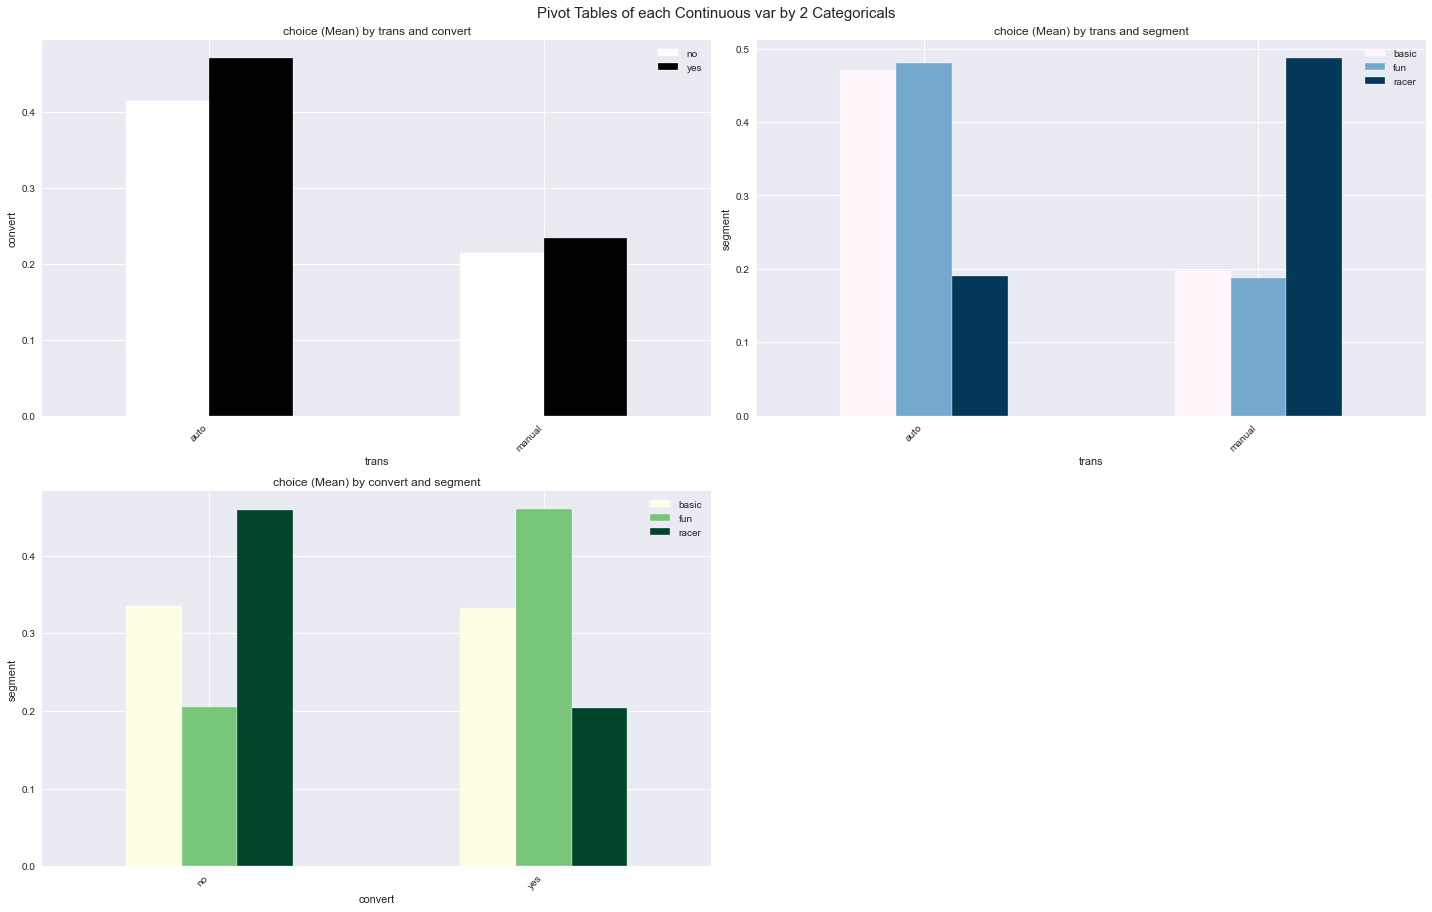

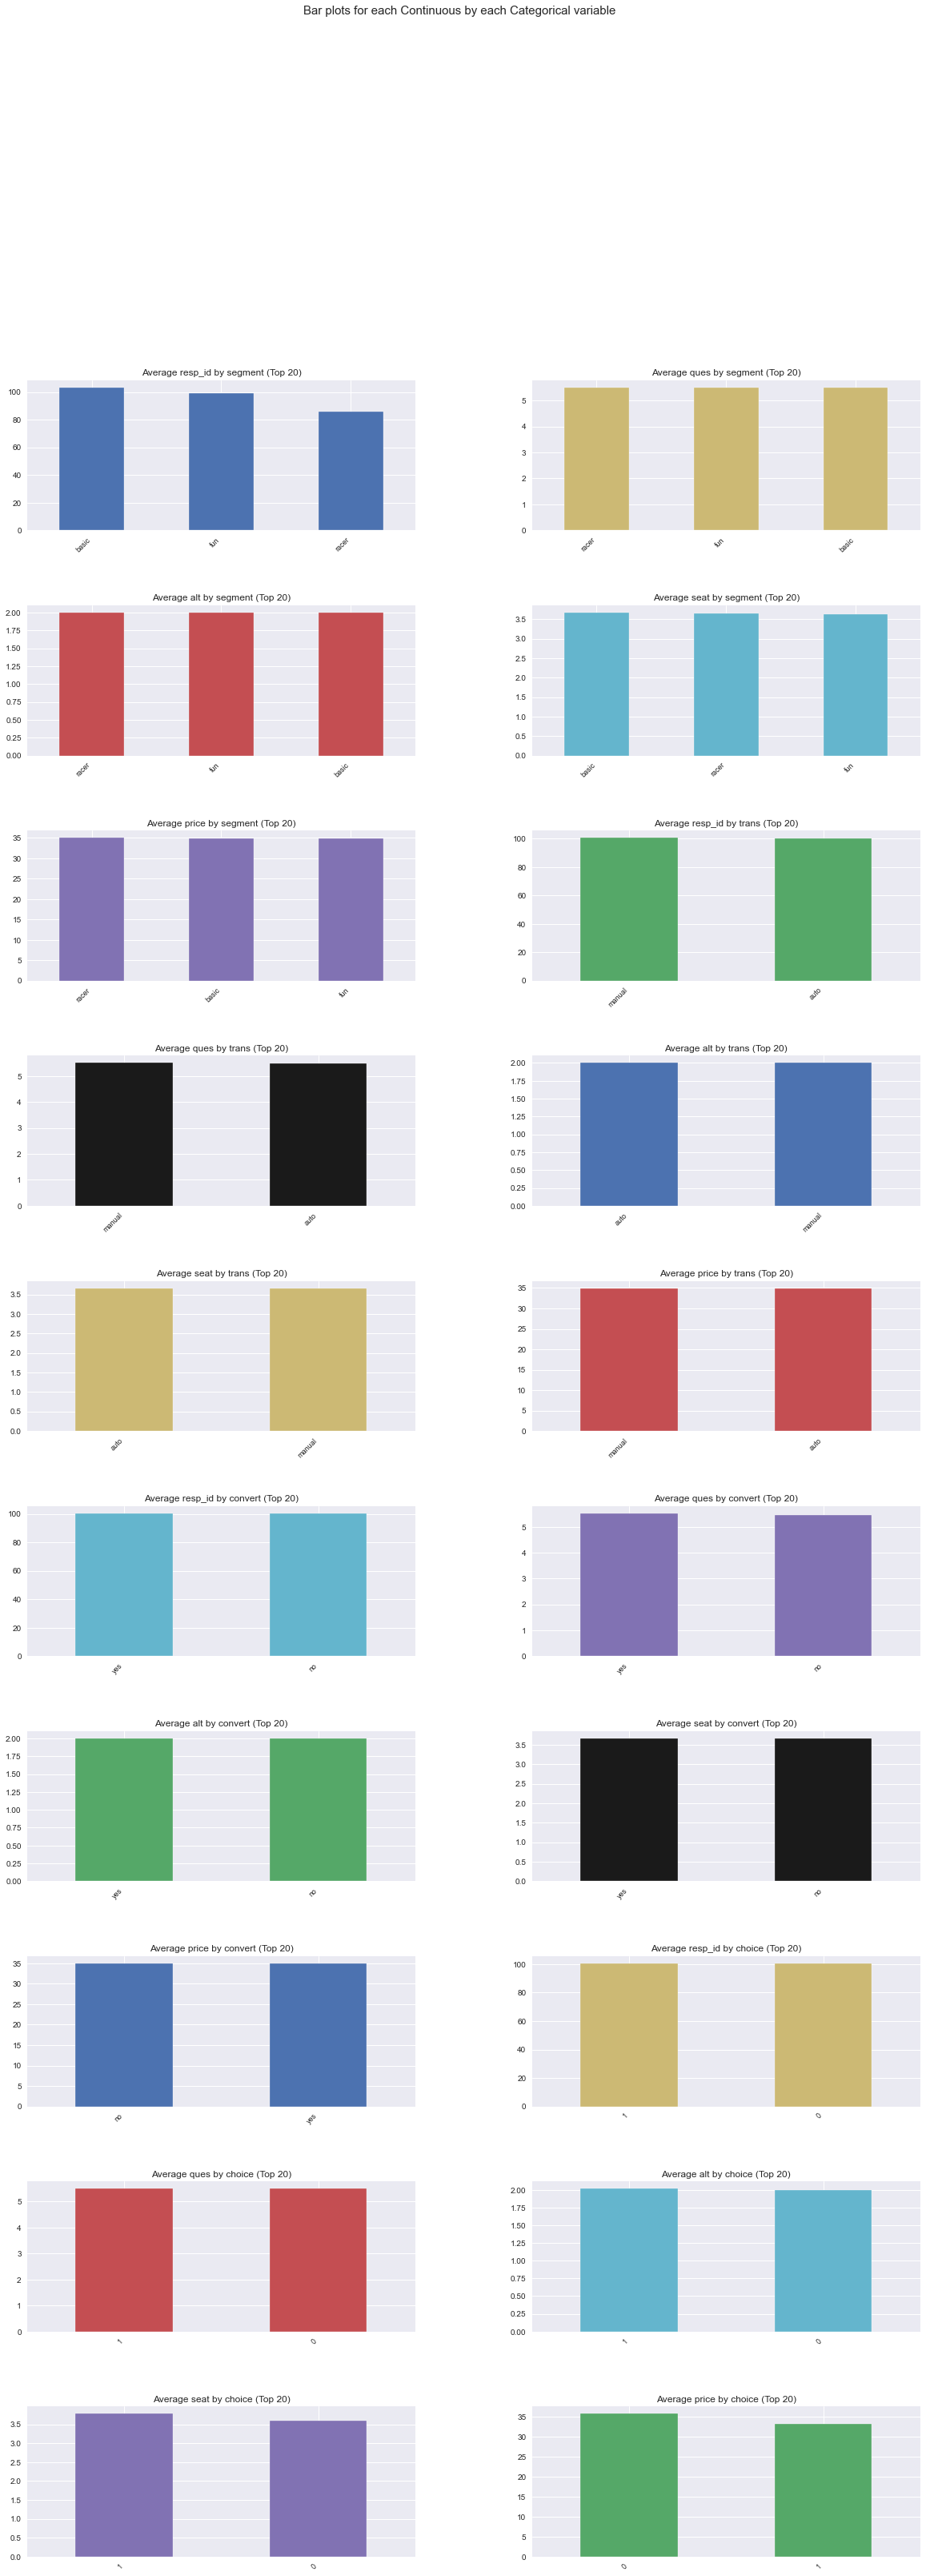

Time to run AutoViz (in seconds) = 32.165

 ###################### VISUALIZATION Completed ########################


In [15]:
#Vizualisation 
filename = "C:\\Users\\welcome\\Downloads\\Car choice\\sportscar_choice_long.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="choice",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="jpg",
    max_rows_analyzed=6000,
    max_cols_analyzed=9,
)

In [16]:
x=dummied.drop(['choice'],axis=1)
y=dummied['choice']

In [19]:
#Splitting train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [20]:
#Building Logistic Regression MOdel
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000,multi_class='multinomial')
lr.fit(xtrain,ytrain)


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [21]:
#Predicting train Data
train_predicted=lr.predict(xtrain)

In [22]:
#Model 
Evaluation 
from sklearn.metrics import accuracy_score
accuracy_score(train_predicted,ytrain)

0.7178571428571429

In [ ]:
LogisticRegression()

In [44]:
#Finding the best parameter using Gridsearchcv
params={'penalty' :['l2','l1'],
    'dual':[False,True],
    'tol':[0.0001,0.000001,0.01,0.002],
    'C' :[1.0,1.2,1.6,1.8,2.0,2.5],
    'fit_intercept' : [True,False],
    'intercept_scaling' :[1],
    'class_weight':[None],
    'solver' : ['lbfgs','newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[100],
    'multi_class' :['auto','ovr'],
    
}

In [45]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(lr,
    param_grid=params
)

In [46]:
clf.fit(xtrain,ytrain)

GridSearchCV(estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial'),
             param_grid={'C': [1.0, 1.2, 1.6, 1.8, 2.0, 2.5],
                         'class_weight': [None], 'dual': [False, True],
                         'fit_intercept': [True, False],
                         'intercept_scaling': [1], 'max_iter': [100],
                         'multi_class': ['auto', 'ovr'],
                         'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'newton-cg', 'lbfgs', 'liblinear',
                                    'sag', 'saga'],
                         'tol': [0.0001, 1e-06, 0.01, 0.002]})

In [47]:
clf.best_score_

0.7202380952380953

In [48]:
clf.best_estimator_

LogisticRegression(C=1.2, fit_intercept=False, multi_class='ovr', penalty='l1',
                   solver='saga', tol=0.01)

In [49]:
#fitting model using best parameters
lr=LogisticRegression(C=1.2, fit_intercept=False, multi_class='ovr', penalty='l1',
                   solver='saga', tol=0.01)
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.2, fit_intercept=False, multi_class='ovr', penalty='l1',
                   solver='saga', tol=0.01)

In [50]:
newtrain_predicted=lr.predict(xtrain)

In [51]:
#Accuracy score for train data
accuracy_score(newtrain_predicted,ytrain)

0.7219047619047619

In [52]:
newtest_predicted=lr.predict(xtest)

In [54]:
#Accuracy score for test data
accuracy_score(newtest_predicted,ytest)

0.7077777777777777